# Introduction

Here I'm looking at the cover times of the random walker versus the urban explorer on the ring graph

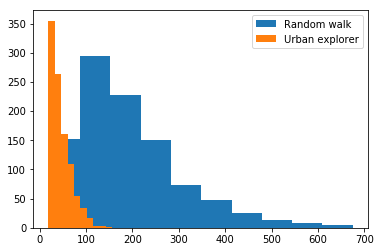

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

num_nodes = 20
G = nx.cycle_graph(num_nodes)

num_trials, m = 1000, 1  # m = number of times each node has to be covered
Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
plt.hist(Ts_rw);plt.hist(Ts_ue);plt.legend(['Random walk','Urban explorer'])

#np.savetxt('data/covertimes_ring_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_ring_random_walker.txt',Ts_rw)

Good. Makes sense; the advective part of the urban explorer is useful on the ring. I wonder could I find
that curve analytically. Is it an exponential?

In [67]:
np.mean(Ts_rw)

45.971

## Be systematic

finished N = 5
finished N = 10
finished N = 15
finished N = 20
finished N = 25
finished N = 30
finished N = 35
finished N = 40
finished N = 45
finished N = 50
finished N = 55
finished N = 60
finished N = 65
finished N = 70
finished N = 75
finished N = 80
finished N = 85
finished N = 90
finished N = 95
finished N = 100


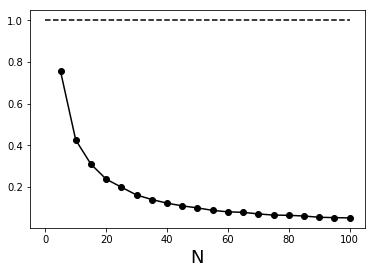

In [107]:
meanTratios = []
varTratios = []
Ns = range(5,101,5)
m = 1
for N in Ns:
    num_trials = 2000
    G = nx.cycle_graph(N)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    #varTratios.append(np.std(Ts_ue) / np.std(Ts_rw) ) 
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
#plt.plot(Ns,varTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

np.savetxt('data/mean_covertime_ratio_ring.txt',meanTratios)
np.savetxt('data/mean_covertime_ratio_ring_Ns.txt',Ns)

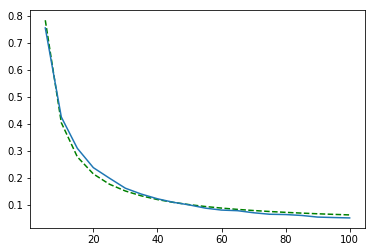

In [117]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a + b/x

popt, pcov = curve_fit(func, Ns, meanTratios)

plt.plot(Ns, func(Ns, *popt), 'g--')
plt.plot(Ns,meanTratios)

### Look at scaling for just u.e. (not ratio)

In [92]:
Ts = []
Ns = range(1,1000,50)
m = 1
for N in Ns:
    num_trials = 500
    G = nx.cycle_graph(N)
    T = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    Ts.append(np.mean(T))
    print 'finished N = ' + str(N)
plt.plot(Ns,Ts,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')

finished N = 1
finished N = 51
finished N = 101
finished N = 151
finished N = 201
finished N = 251
finished N = 301
finished N = 351
finished N = 401
finished N = 451
finished N = 501
finished N = 551
finished N = 601
finished N = 651


KeyboardInterrupt: 

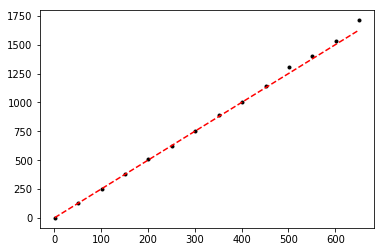

In [94]:
Ns = range(1,700,50)
plt.plot(Ns,Ts,'k.')
plt.plot(Ns,2.5*np.array(Ns),'r--')

Looks like it could be $T \sim \frac{5}{2} N$

### Redo

finished N = 10
finished N = 50
finished N = 100
finished N = 150
finished N = 200
finished N = 250
finished N = 300
finished N = 350
finished N = 400
finished N = 450
finished N = 500
finished N = 550
finished N = 600
finished N = 650
finished N = 700
finished N = 750
finished N = 800
finished N = 850
finished N = 900
finished N = 950
finished N = 1000


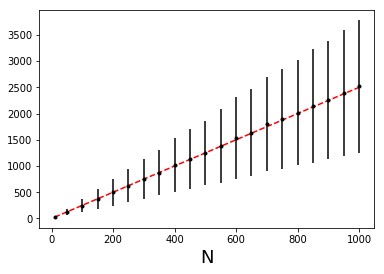

In [72]:
T_mean = []
T_std = []
Ns = [10] + range(50,1001,50)
m = 1
for N in Ns:
    num_trials = 5000
    G = nx.cycle_graph(N)
    T = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    T_mean.append(np.mean(T))
    T_std.append(np.std(T))
    print 'finished N = ' + str(N)
plt.errorbar(Ns,T_mean,yerr=T_std, fmt='k.')
plt.xlabel('N',fontsize=18)
plt.plot(Ns,2.5*np.array(Ns),'r--')
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} 

I'm running for 5000 trials, to be as exact as possible.

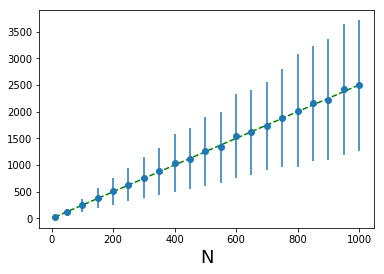

In [35]:
plt.errorbar(Ns,T_mean,yerr=T_std, fmt='o')
plt.xlabel('N',fontsize=18)
plt.plot(Ns,2.5*np.array(Ns),'g--')

<ErrorbarContainer object of 3 artists>

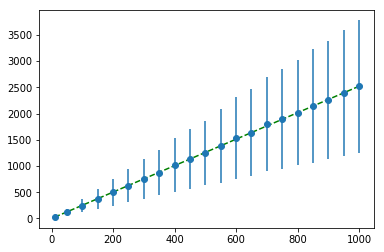

In [73]:
from scipy.optimize import curve_fit
def func(N,b,c):
    return b*N**c
popt, pcov = curve_fit(func,Ns,T_mean)
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.errorbar(Ns,T_mean,yerr=T_std,fmt='o')

<ErrorbarContainer object of 3 artists>

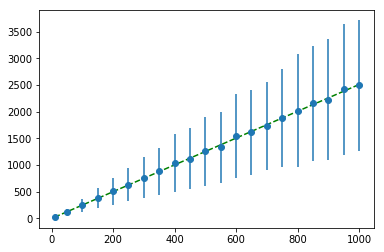

In [70]:
from scipy.optimize import curve_fit
def func(N,b):
    return N*b
popt, pcov = curve_fit(func,Ns,T_mean)
plt.plot(Ns, [func(N,popt[0]) for N in Ns], 'g--')
plt.errorbar(Ns,T_mean,yerr=T_std,fmt='o')

In [74]:
popt

array([2.49113796, 1.00173976])

In [65]:
popt[0]*Ns[0]

25.08541503208029

In [75]:
np.savetxt('data/mean_cover_td_ring.txt',T_mean)
np.savetxt('data/mean_cover_td_ring_Ns.txt',Ns)
np.savetxt('data/mean_cover_td_ring_std.txt',T_std)